In [5]:
import pandas as pd
csv_path=('heart.csv')
heart_data= pd.read_csv(csv_path)
class_distribution = heart_data['target'].value_counts()
print(class_distribution)
print(heart_data.head())

target
1    526
0    499
Name: count, dtype: int64
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


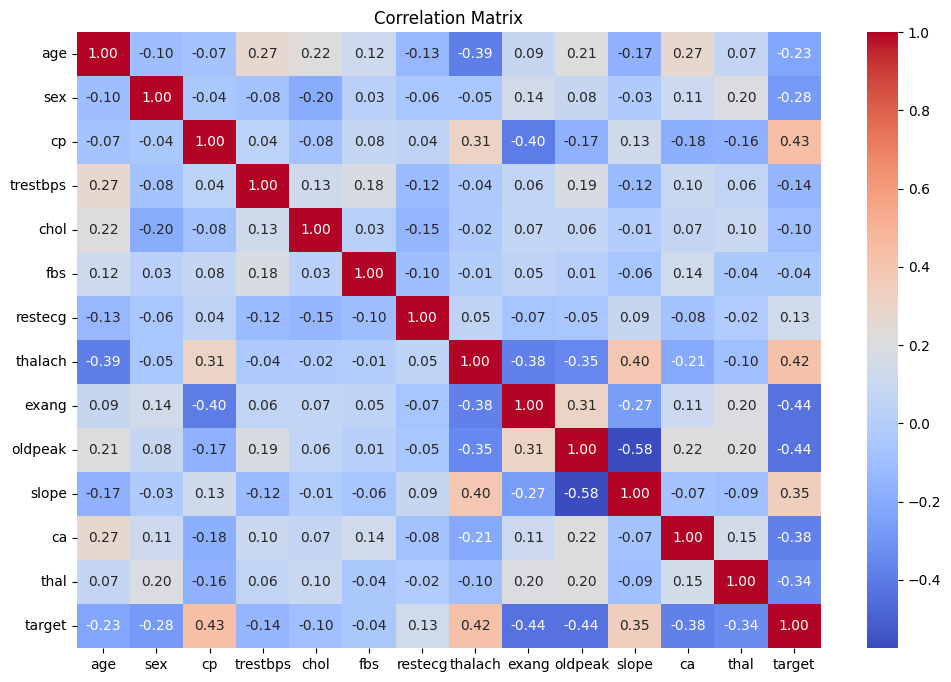

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = heart_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

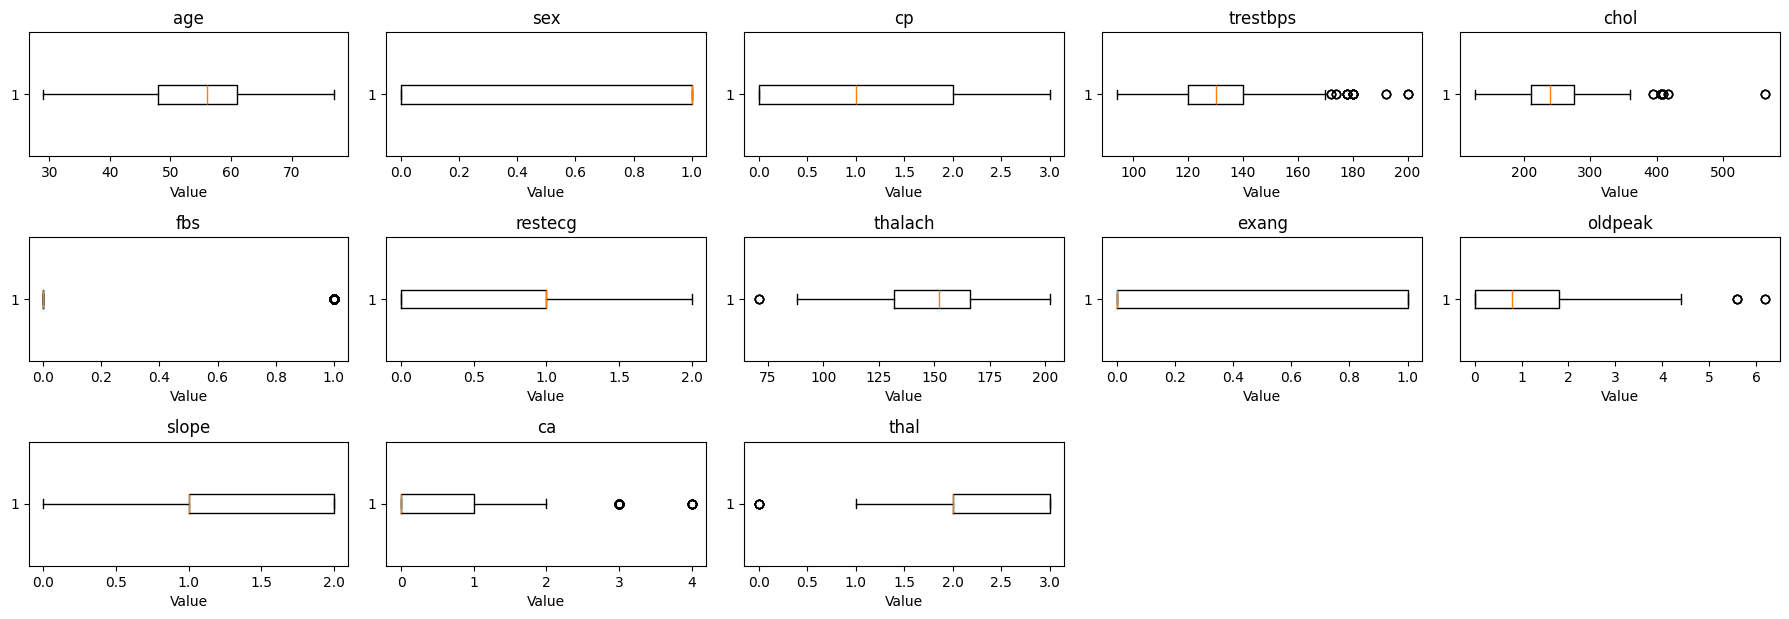

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
for i, feature in enumerate(heart_data.columns):
    if feature != 'target':
        plt.subplot(6, 5, i + 1)
        plt.boxplot(heart_data[feature], vert=False)
        plt.title(feature)
        plt.xlabel("Value")
plt.tight_layout()
plt.show()


In [5]:
print(heart_data.shape)

(1025, 14)


In [ ]:
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


X = heart_data.drop("target", axis=1)
Y = heart_data["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Eğitim seti boyutu:", X_train.shape[0])
print("Test seti boyutu:", X_test.shape[0])

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

Y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


train_set = X_train.copy()
train_set['target'] = Y_train

test_set = X_test.copy()
test_set['target'] = Y_test

overlap = pd.merge(train_set, test_set, how='inner', on=train_set.columns.tolist())

if not overlap.empty:
    print("Overlap:")
    print(overlap)
else:
    print("No overlap.")


Eğitim seti boyutu: 820
Test seti boyutu: 205
Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767
F1 Score: 0.9852216748768473

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Overlap:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     51    1   2       125   245    1        0      166      0      2.4   
1     51    1   2       125   245    1        0      166      0      2.4   
2     41    1   1       135   203    0        1      132      0      0.0   
3     41    1   1       135   203    0        1      132      0      0.0   
4     41    1   1       135   203    0        1      132      0      0.0   
..   ...  ...  ..       ...   ...  ... 